<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M5L3_Controlling_the_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Controlling the player

[PPT M5L3 ENG](https://docs.google.com/presentation/d/1MUtiFVmMbbG0Wygv9CfO3kWfawP_7bMkdtQ8Mq1DSEU/edit?usp=sharing)

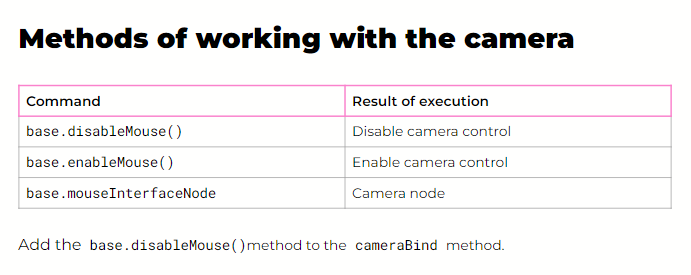

## game.py

In [ ]:
# connect base scene class
from direct.showbase.ShowBase import ShowBase
from mapmanager import *
from hero import Hero

class Game(ShowBase):
    def __init__(self):
        ShowBase.__init__(self)
        self.land = Mapmanager()
        self.land.loadLand("land.txt")
        # self.land.loadLand("land2.txt")
        # x,y = self.land.loadLand("land.txt")
        self.hero = Hero((11, 22, 2), self.land)
        base.camLens.setFov(90)

game = Game()
game.run()

## mapmanager.py

In [ ]:
# write the code for creating and managing the map here
class Mapmanager():

    """ Managing map """
    def __init__(self):
        #   Load a block model, set a texture, create a property for the color, model and texture
        self.model = 'block.egg'
        self.texture = 'block.png'
        self.colors = [
            (0.5, 0.3, 0.0, 1),
            (0.2, 0.2, 0.3, 1),
            (0.5, 0.5, 0.2, 1),
            (0.0, 0.6, 0.0, 1)
        ] # rgba

        # create nodes
        self.startNew()
        # add block
        # self.addBlock((0, 10, 0))

    def startNew(self):
        self.land = render.attachNewNode("Land")

    def addBlock(self, position):
      self.block = loader.loadModel(self.model)
      self.block.setTexture(loader.loadTexture(self.texture))
      self.block.setPos(position)
      self.block.reparentTo(self.land)

      self.color = self.getColor(position[2]) # sesuai posisi z
      self.block.setColor(self.color)

    def getColor(self, z):
        if z < len(self.colors):
            return self.colors[z]
        else:
            return self.colors[-1]

    def clear(self):
        self.land.removeNode()
        self.startNew()

    def loadLand(self, filename):
        with open(filename) as file:
            y = 0
            for line in file:
                x = 0
                line = line.split(' ')
                for z in line:
                    for z0 in range(int(z)+1):
                        block = self.addBlock((x,y,z0))
                    x += 1
                y += 1



## hero.py

In [ ]:
class Hero():
    def __init__(self, pos, land):
        # create the land = land property
        self.land = land
        # create a hero property and load the model
        self.hero = loader.loadModel('smiley')
        # set the color for the hero
        self.hero.setColor(1, 0.5, 0)
        # set the size for the hero
        self.hero.setScale(0.3)
        # set the position for the hero
        self.hero.setPos(pos)
        # set the parent render node
        self.hero.reparentTo(render)

        self.mode = True

        self.cameraBind()
        self.accept_events()

    def cameraBind(self):
        # disable camera control using the mouse
        base.disableMouse()
        base.camera.setH(180) # flip camera
        # bind the camera to the self.hero object node
        base.camera.reparentTo(self.hero)
        # set the camera at the given coordinates
        base.camera.setPos(0, 0, 1.5)

        self.cameraOn = True

    def cameraUp(self):
        pos = self.hero.getPos()
        base.mouseInterfaceNode.setPos(-pos[0], -pos[1], -pos[2]-3)
        base.camera.reparentTo(render)
        base.enableMouse()
        self.cameraOn = False

    def accept_events(self):
        # camera view
        base.accept('c', self.changeView)
        # left
        base.accept('n', self.turn_left)
        base.accept('n'+'-repeat', self.turn_left)
        # right
        base.accept('m', self.turn_right)
        base.accept('m'+'-repeat', self.turn_right)

        '''player'''
        # left
        base.accept('a', self.left)
        base.accept('a'+'-repeat', self.left)
        # right
        base.accept('d', self.right)
        base.accept('d'+'-repeat', self.right)
        # forward
        base.accept('w', self.forward)
        base.accept('w'+'-repeat', self.forward)
        # backward
        base.accept('s', self.back)
        base.accept('s'+'-repeat', self.back)

    def changeView(self):
        if self.cameraOn:
            self.cameraUp()
        else:
            self.cameraBind()

    def turn_left(self):
        self.hero.setH((self.hero.getH() + 5) % 360)

    def turn_right(self):
        self.hero.setH((self.hero.getH() - 5) % 360)

    # spectator mode --> move to desired coordinates
    def just_move(self, angle):
        pos = self.look_at(angle)
        self.hero.setPos(pos)

    # basic game mode
    # def try_move(self, angle):
    #     pass

    # type of movement
    def move_to(self, angle):
        if self.mode:
            self.just_move(angle)

    '''spectator mode'''
    def look_at(self, angle):
        from_x = round(self.hero.getX())
        from_y = round(self.hero.getY())
        from_z = round(self.hero.getZ())

        dx,dy = self.check_dir(angle)

        return from_x + dx, from_y + dy, from_z

    def check_dir(self, angle):
        if angle >= 0 and angle <= 20:
            return 0, -1
        elif angle <= 65:
           return (1, -1)
        elif angle <= 110:
            return (1, 0)
        elif angle <= 155:
            return (1, 1)
        elif angle <= 200:
            return (0, 1)
        elif angle <= 245:
            return (-1, 1)
        elif angle <= 290:
            return (-1, 0)
        elif angle <= 335:
            return (-1, -1)
        else:
            return (0, -1)


    '''event handling'''
    def forward(self):
        angle =(self.hero.getH()) % 360
        self.move_to(angle)

    def back(self):
        angle =(self.hero.getH()+180) % 360
        self.move_to(angle)

    def left(self):
        angle =(self.hero.getH()+90) % 360
        self.move_to(angle)

    def right(self):
        angle =(self.hero.getH()+270) % 360
        self.move_to(angle)

